# **Penting**
- Jangan mengubah atau menambahkan cell text yang sudah disediakan, Anda hanya perlu mengerjakan cell code yang sudah disediakan.
- Pastikan seluruh kriteria memiliki output yang sesuai, karena jika tidak ada output dianggap tidak selesai.
- Misal, Anda menggunakan df = df.dropna() silakan gunakan df.isnull().sum() sebagai tanda sudah berhasil. Silakan sesuaikan seluruh output dengan perintah yang sudah disediakan.
- Pastikan Anda melakukan Run All sebelum mengirimkan submission untuk memastikan seluruh cell berjalan dengan baik.
- Pastikan Anda menggunakan variabel df dari awal sampai akhir dan tidak diperbolehkan mengganti nama variabel tersebut.
- Hapus simbol pagar (#) pada kode yang bertipe komentar jika Anda menerapkan kriteria tambahan
- Biarkan simbol pagar (#) jika Anda tidak menerapkan kriteria tambahan
- Pastikan Anda mengerjakan sesuai section yang sudah diberikan tanpa mengubah judul atau header yang disediakan.

# **INFORMASI DATASET**

Dataset ini menyajikan gambaran mendalam mengenai perilaku transaksi dan pola aktivitas keuangan, sehingga sangat ideal untuk eksplorasi **deteksi penipuan (fraud detection)** dan **identifikasi anomali**. Dataset ini mencakup **2.512 sampel data transaksi**, yang mencakup berbagai atribut transaksi, demografi nasabah, dan pola penggunaan.

Setiap entri memberikan wawasan komprehensif terhadap perilaku transaksi, memungkinkan analisis untuk **keamanan finansial** dan pengembangan model prediktif.

## Fitur Utama

- **`TransactionID`**: Pengidentifikasi unik alfanumerik untuk setiap transaksi.  
- **`AccountID`**: ID unik untuk setiap akun, dapat memiliki banyak transaksi.  
- **`TransactionAmount`**: Nilai transaksi dalam mata uang, mulai dari pengeluaran kecil hingga pembelian besar.  
- **`TransactionDate`**: Tanggal dan waktu transaksi terjadi.  
- **`TransactionType`**: Tipe transaksi berupa `'Credit'` atau `'Debit'`.  
- **`Location`**: Lokasi geografis transaksi (nama kota di Amerika Serikat).  
- **`DeviceID`**: ID perangkat yang digunakan dalam transaksi.  
- **`IP Address`**: Alamat IPv4 yang digunakan saat transaksi, dapat berubah untuk beberapa akun.  
- **`MerchantID`**: ID unik merchant, menunjukkan merchant utama dan anomali transaksi.  
- **`AccountBalance`**: Saldo akun setelah transaksi berlangsung.  
- **`PreviousTransactionDate`**: Tanggal transaksi terakhir pada akun, berguna untuk menghitung frekuensi transaksi.  
- **`Channel`**: Kanal transaksi seperti `Online`, `ATM`, atau `Branch`.  
- **`CustomerAge`**: Usia pemilik akun.  
- **`CustomerOccupation`**: Profesi pengguna seperti `Dokter`, `Insinyur`, `Mahasiswa`, atau `Pensiunan`.  
- **`TransactionDuration`**: Lama waktu transaksi (dalam detik).  
- **`LoginAttempts`**: Jumlah upaya login sebelum transaksi—jumlah tinggi bisa mengindikasikan anomali.

Tugas kamu adalah membuat model clustering yang selanjutnya akan digunakan untuk membuat model klasifikasi.


# **1. Import Library**
Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning. Semua library yang dibutuhkan harus **import** di **cell** ini, jika ada library yang dijalankan di cell lain maka **submission langsung ditolak**

In [103]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from yellowbrick.cluster import KElbowVisualizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import joblib

# **2. Memuat Dataset**
Pada tahap ini, Anda perlu memuat dataset ke dalam notebook lalu mengecek informasi dataset sebelum nantinya dilakukan pembersihan. Hal-hal yang perlu dilakukan pada tahapan ini yaitu:
1. **Memahami Struktur Data**
   - Dataset harus mengambil referensi wajib digunakan (bisa dilihat [Disini](https://drive.google.com/drive/folders/1Zs7VmPZ-jNwsRlMKH65Ea-LApSwx6lKx?usp=drive_link))
   - Melakukan loading dataset ke dalam notebook dan menampilkan 5 baris pertama dengan function `head`.
   - Tinjau jumlah baris kolom dan jenis data dalam dataset dengan function `info`.  
   - Menampilkan statistik deskriptif dataset dengan menjalankan `describe`.
   - Pastikan **setiap function tersebut** memiliki **output pada setiap cell** code. Jika tidak **submission langsung ditolak**
   

Gunakan code ini untuk melakukan load data secara otomatis tanpa harus download data tersebut secara manual:
```python
url='https://docs.google.com/spreadsheets/d/e/2PACX-1vTbg5WVW6W3c8SPNUGc3A3AL-AG32TPEQGpdzARfNICMsLFI0LQj0jporhsLCeVhkN5AoRsTkn08AYl/pub?gid=2020477971&single=true&output=csv'
df = pd.read_csv(url)
```

Penting: pada kriteria pertama hindari penggunaan print() dan display() karena seluruh fungsi yang digunakan sudah memiliki standar output dan menghasilkan output yang diharapkan.

Kriteria 1 akan ditolak ketika:
- print(__.head())
- display(___.head())
dst

Kriteria 1 akan diterima ketika Anda menggunakan fungsi yang diminta tanpa menambahkan deskripsi apapun.

In [104]:
# Load data
url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vTbg5WVW6W3c8SPNUGc3A3AL-AG32TPEQGpdzARfNICMsLFI0LQj0jporhsLCeVhkN5AoRsTkn08AYl/pub?gid=2020477971&single=true&output=csv'
df = pd.read_csv(url)

In [105]:
# Tampilkan 5 baris pertama dengan function head.
print("Tampilkan 5 Baris Pertama dari Dataset")
print(df.head())

Tampilkan 5 Baris Pertama dari Dataset
  TransactionID AccountID  TransactionAmount PreviousTransactionDate  \
0      TX000001   AC00128              14.09     2023-04-11 16:29:14   
1      TX000002   AC00455             376.24     2023-06-27 16:44:19   
2      TX000003   AC00019             126.29     2023-07-10 18:16:08   
3      TX000004   AC00070             184.50     2023-05-05 16:32:11   
4      TX000005   AC00411              13.45     2023-10-16 17:51:24   

  TransactionType   Location DeviceID      IP Address MerchantID Channel  \
0           Debit  San Diego  D000380  162.198.218.92       M015     ATM   
1           Debit    Houston  D000051     13.149.61.4       M052     ATM   
2           Debit       Mesa  D000235  215.97.143.157       M009  Online   
3           Debit    Raleigh  D000187  200.13.225.150       M002  Online   
4          Credit    Atlanta  D000308    65.164.3.100       M091  Online   

   CustomerAge CustomerOccupation  TransactionDuration  LoginAttempts  

In [106]:
# Tinjau jumlah baris kolom dan jenis data dalam dataset dengan info.
print("Informasi Dataset")
print(df.info())

Informasi Dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2508 non-null   object 
 1   AccountID                2516 non-null   object 
 2   TransactionAmount        2511 non-null   float64
 3   PreviousTransactionDate  2509 non-null   object 
 4   TransactionType          2507 non-null   object 
 5   Location                 2507 non-null   object 
 6   DeviceID                 2507 non-null   object 
 7   IP Address               2517 non-null   object 
 8   MerchantID               2514 non-null   object 
 9   Channel                  2510 non-null   object 
 10  CustomerAge              2519 non-null   float64
 11  CustomerOccupation       2514 non-null   object 
 12  TransactionDuration      2511 non-null   float64
 13  LoginAttempts            2516 non-null   float64
 14  Accoun

In [107]:
# Menampilkan statistik deskriptif dataset dengan menjalankan describe
print(df.describe())

       TransactionAmount  CustomerAge  TransactionDuration  LoginAttempts  \
count        2511.000000  2519.000000          2511.000000    2516.000000   
mean          297.656468    44.678444           119.422939       1.121622   
std           292.230367    17.837359            70.078513       0.594469   
min             0.260000    18.000000            10.000000       1.000000   
25%            81.310000    27.000000            63.000000       1.000000   
50%           211.360000    45.000000           112.000000       1.000000   
75%           413.105000    59.000000           161.000000       1.000000   
max          1919.110000    80.000000           300.000000       5.000000   

       AccountBalance  
count     2510.000000  
mean      5113.438124  
std       3897.975861  
min        101.250000  
25%       1504.727500  
50%       4734.110000  
75%       7672.687500  
max      14977.990000  


(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

**Apabila ingin menerapkan Advanced, pastikan seluruh visualisasi tidak ada yang overlap**

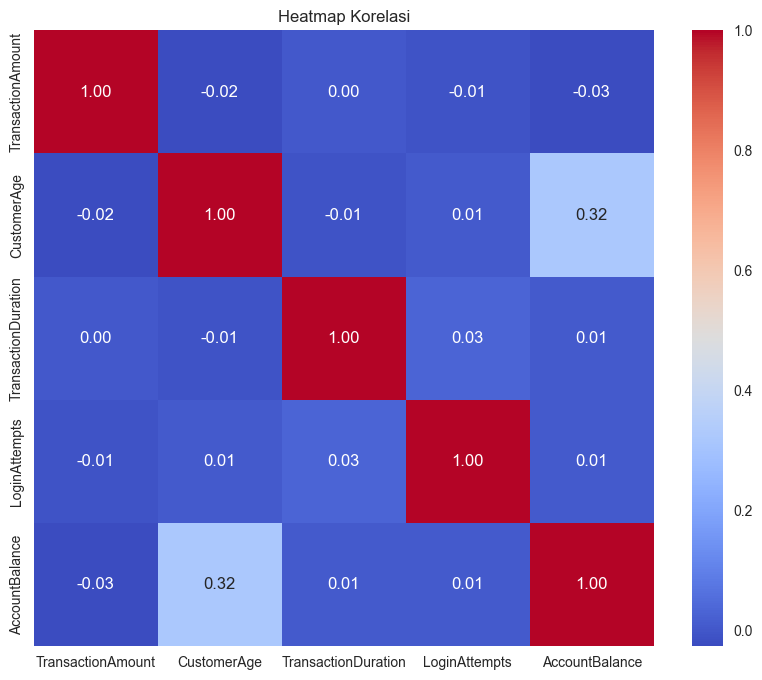

In [108]:
# Menampilkan korelasi antar fitur (Opsional Skilled 1)
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Heatmap Korelasi")
plt.show()

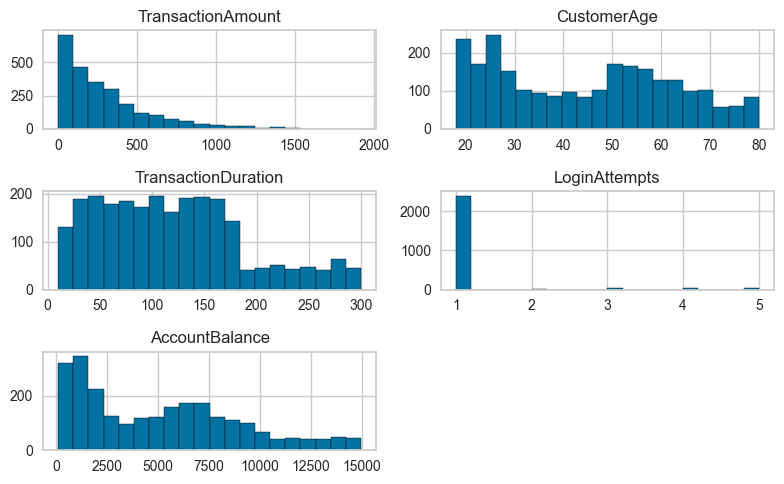

In [109]:
# Menampilkan histogram untuk semua kolom numerik (Opsional Skilled 1)
df.hist(figsize=(8,5), bins=20, edgecolor='black')
plt.title("Histogram Semua Kolom Numerik")
plt.tight_layout()
plt.show()

(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

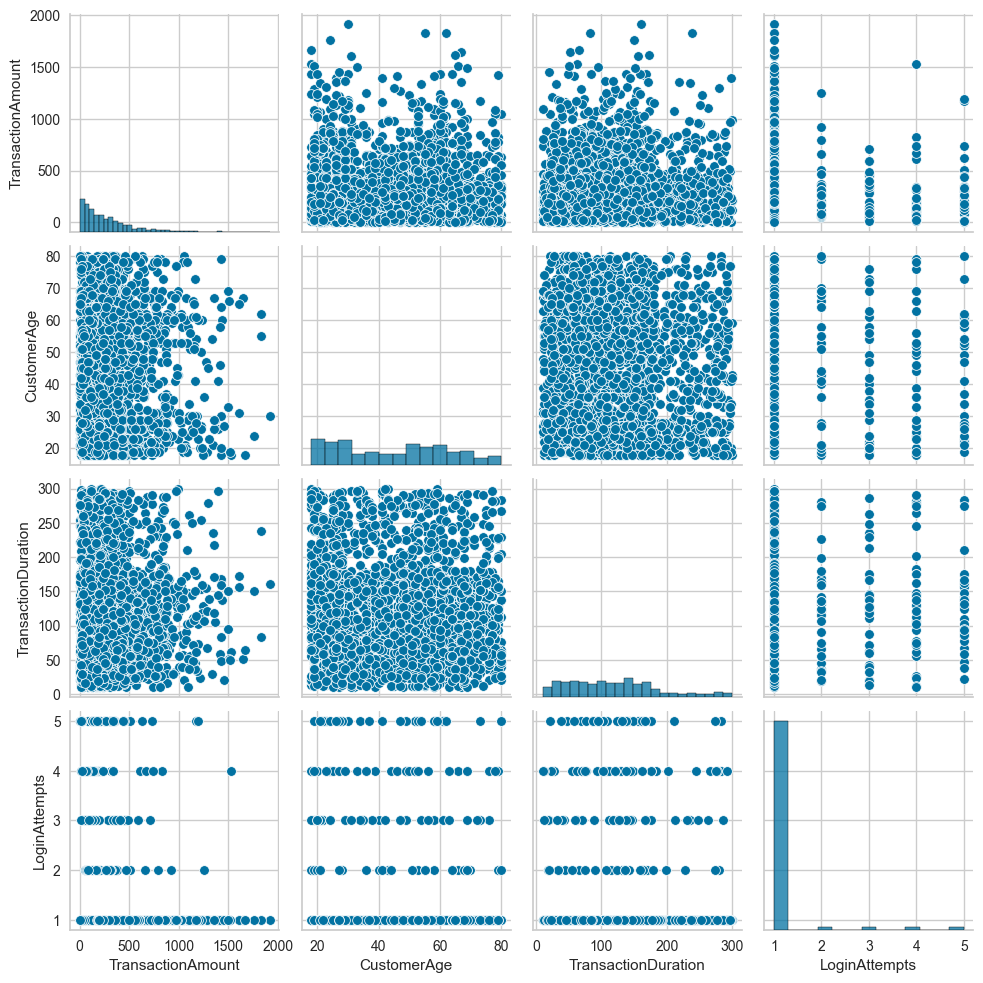

In [110]:
# Visualisasi yang lebih informatif (Opsional Advanced 1)
numeric_features = df.select_dtypes(include='number').columns
subset_cols = numeric_features[:4]
sns.pairplot(df[subset_cols])
plt.show()


# **3. Pembersihan dan Pra Pemrosesan Data**

Pada tahap ini, Anda akan melakukan **Pembersihan Dataset** untuk menjadikan dataset mudah diintepretasi dan bisa dilatih. Hal-hal yang wajib kamu lakukan yaitu:

1. **Mengecek dataset** menggunakan isnull().sum() dan duplicated().sum().
2. Melakukan feature scaling menggunakan `MinMaxScaler()` atau `StandardScalar()` untuk fitur numerik.
3. Melakukan feature encoding menggunakan `LabelEncoder()` untuk fitur kategorikal.
4. Melakukan drop pada kolom id.
5. **Ketentuan Cell Code**
   - Pastikan **setiap pemeriksaan tersebut** memiliki **output pada cell-nya**. Jika tidak **submission langsung ditolak**


In [111]:
# Mengecek dataset menggunakan isnull().sum()
print(df.isnull().sum())

TransactionID              29
AccountID                  21
TransactionAmount          26
PreviousTransactionDate    28
TransactionType            30
Location                   30
DeviceID                   30
IP Address                 20
MerchantID                 23
Channel                    27
CustomerAge                18
CustomerOccupation         23
TransactionDuration        26
LoginAttempts              21
AccountBalance             27
TransactionDate            24
dtype: int64


In [112]:
# Mengecek dataset menggunakan duplicated().sum()
print(df.duplicated().sum())

21


In [113]:
# Melakukan feature scaling menggunakan MinMaxScaler() atau StandardScalar() untuk fitur numerik.
# Pastikan kamu menggunakan function head setelah melalukan scaling.
numeric_features = df.select_dtypes(include='number').columns

scaler = MinMaxScaler()
df[numeric_features] = scaler.fit_transform(df[numeric_features])
df.head()

,TransactionID,AccountID,TransactionAmount,PreviousTransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate
0,TX000001,AC00128,0.007207,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,0.838710,Doctor,0.244828,0.0,0.336832,2024-11-04 8:08:08
1,TX000002,AC00455,0.195940,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,0.806452,Doctor,0.451724,0.0,0.918055,2024-11-04 8:09:35
2,TX000003,AC00019,0.065680,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,0.016129,Student,0.158621,0.0,0.068637,2024-11-04 8:07:04
3,TX000004,AC00070,0.096016,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,0.129032,Student,0.051724,0.0,0.569198,2024-11-04 8:09:06
4,TX000005,AC00411,0.006874,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,0.648276,0.0,0.492591,2024-11-04 8:06:39


In [114]:
# Melakukan drop pada kolom yang memiliki keterangan id dan IP Address
df = df.drop(columns=[col for col in df.columns if 'id' in col.lower() or 'ip address' in col.lower()], errors='ignore')

In [115]:
# Melakukan feature encoding menggunakan LabelEncoder() untuk fitur kategorikal.
# Pastikan kamu menggunakan function head setelah melalukan encoding.
numeric_features = df.select_dtypes(include='number').columns
categorical_features = df.select_dtypes(include='object').columns
le = LabelEncoder()
for col in categorical_features:
    df[col] = le.fit_transform(df[col].astype(str))

df.head()

,TransactionAmount,PreviousTransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate
0,0.007207,680,1,36,0,0.838710,0,0.244828,0.0,0.336832,105
1,0.195940,1178,1,15,0,0.806452,0,0.451724,0.0,0.918055,192
2,0.065680,1262,1,23,2,0.016129,3,0.158621,0.0,0.068637,41
3,0.096016,818,1,33,2,0.129032,3,0.051724,0.0,0.569198,163
4,0.006874,1939,0,1,2,NaN,3,0.648276,0.0,0.492591,16


In [116]:
# Last checking gunakan columns.tolist() untuk checking seluruh fitur yang ada.
# Perbaiki kode di bawah ini tanpa menambahkan atau mengurangi cell code ini.
# ____.columns.tolist()
df.columns.tolist()

['TransactionAmount',
 'PreviousTransactionDate',
 'TransactionType',
 'Location',
 'Channel',
 'CustomerAge',
 'CustomerOccupation',
 'TransactionDuration',
 'LoginAttempts',
 'AccountBalance',
 'TransactionDate']

(Opsional) Pembersihan dan Pra Pemrosesan Data [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [117]:
# Menangani data yang hilang (bisa menggunakan dropna() atau metode imputasi fillna()).
df = df.fillna(df.median(numeric_only=True))

In [118]:
# Menghapus data duplikat menggunakan drop_duplicates().
df = df.drop_duplicates()

(Opsional) Pembersihan dan Pra Pemrosesan Data [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [119]:
# Melakukan Handling Outlier Data berdasarkan jumlah outlier, apakah menggunakan metode drop atau mengisi nilai tersebut.
col = numeric_features[0]
Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

In [120]:
# Melakukan binning data berdasarkan kondisi rentang nilai pada fitur numerik,
# lakukan pada satu sampai dua fitur numerik.
# Silahkan lakukan encode hasil binning tersebut menggunakan LabelEncoder.
# Pastikan kamu mengerjakan tahapan ini pada satu cell.
bin_col = numeric_features[1]
bins = [0, 0.33, 0.66, 1.0]
labels = ['low', 'mid', 'high']
df['bin_' + bin_col] = pd.cut(df[bin_col], bins=bins, labels=labels)
df['bin_' + bin_col] = le.fit_transform(df['bin_' + bin_col].astype(str))

# **4. Membangun Model Clustering**
Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan.
1. Pastikan Anda menggunakan dataframe yang sudah melalui processing sesuai dengan levelnya (Basic, Skilled, Advanced)
2. Melakukan visualisasi Elbow Method untuk menentukan jumlah cluster terbaik menggunakan `KElbowVisualizer()`.
3. Menggunakan algoritma K-Means Clustering dengan `sklearn.cluster.KMeans()`.
4. Jalankan cell code `joblib.dump(model_kmeans, "model_clustering.h5")` untuk menyimpan model yang sudah dibuat.

In [121]:
# Gunakan describe untuk memastikan proses clustering menggunakan dataset hasil preprocessing
# Lengkapi kode ini dengan mengubah nama DataFrame yang akan dilatih.
# Kode harus digunakan dan dilarang menambahkan syntax lainnya pada cell ini.
# ___.describe()
df.describe()

,TransactionAmount,PreviousTransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate,bin_CustomerAge
count,2401.000000,2401.000000,2401.000000,2401.000000,2401.000000,2401.000000,2401.000000,2401.000000,2401.000000,2401.000000,2401.000000,2401.000000
mean,0.132555,1249.758017,0.786756,21.279050,1.010829,0.430076,1.528113,0.377291,0.030508,0.338435,180.855060,1.117451
std,0.112426,724.827548,0.439137,12.383373,0.828583,0.285457,1.150426,0.240561,0.148538,0.260681,103.671696,0.811603
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.040993,625.000000,1.000000,11.000000,0.000000,0.145161,0.000000,0.182759,0.000000,0.095959,92.000000,0.000000
50%,0.104010,1243.000000,1.000000,21.000000,1.000000,0.435484,2.000000,0.351724,0.000000,0.311416,181.000000,1.000000
75%,0.193454,1880.000000,1.000000,32.000000,2.000000,0.661290,3.000000,0.520690,0.000000,0.506899,271.000000,2.000000
max,0.467223,2485.000000,2.000000,43.000000,3.000000,1.000000,4.000000,1.000000,1.000000,1.000000,360.000000,3.000000


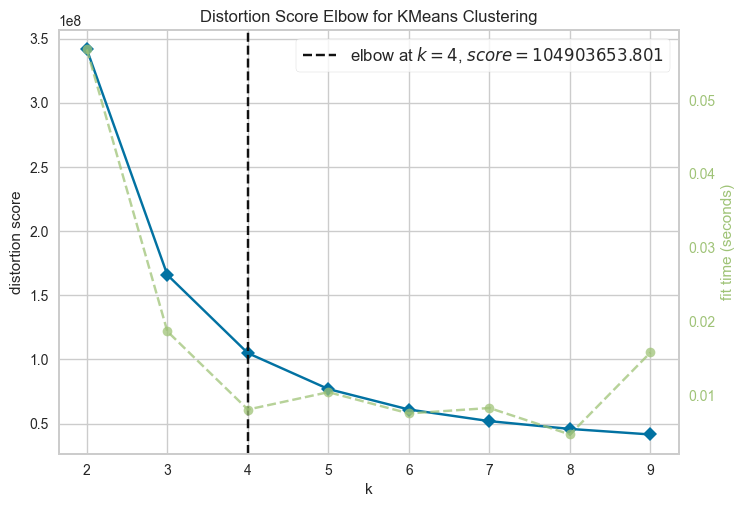

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [122]:
# Melakukan visualisasi Elbow Method menggunakan KElbowVisualizer()
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2, 10))
visualizer.fit(df)
visualizer.show()

In [123]:
# Menggunakan algoritma K-Means Clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(df)

KMeans(n_clusters=4, random_state=42)

Jalankan cell code ini untuk menyimpan model kamu.

In [124]:
# Menyimpan model menggunakan joblib
# import joblib
# joblib.dump(___, "model_clustering.h5")
joblib.dump(kmeans, "model_clustering.h5")

['model_clustering.h5']

(Opsional) Membangun Model Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [125]:
# Menghitung dan menampilkan nilai Silhouette Score.
labels = kmeans.labels_
score = silhouette_score(df, labels)
print(f'Silhouette Score: {score}')

Silhouette Score: 0.4985374525897895


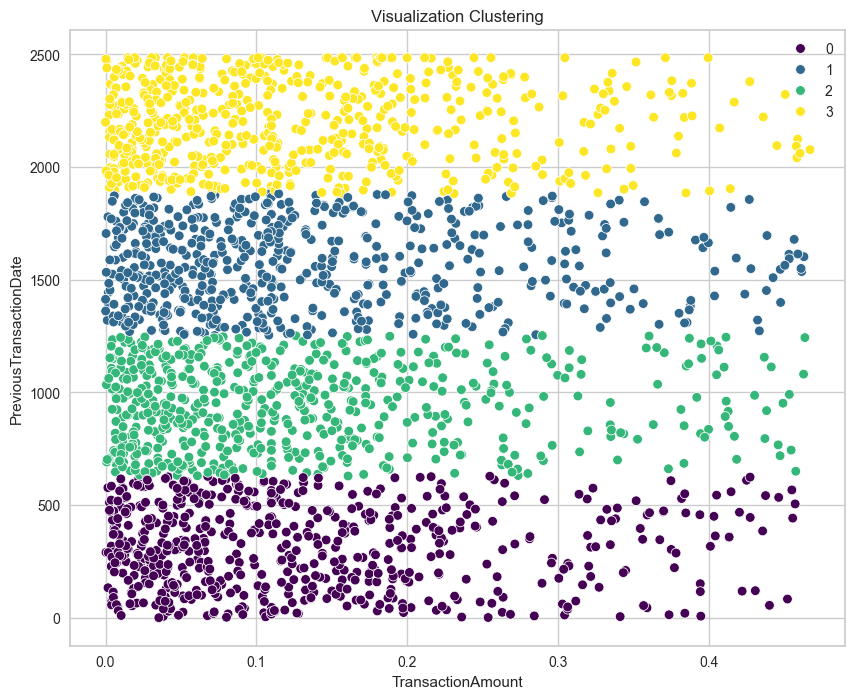

In [126]:
# Membuat visualisasi hasil clustering
plt.figure(figsize=(10, 8))
sns.scatterplot(x=df.iloc[:, 0], y=df.iloc[:,1], hue=labels, palette='viridis')
plt.title("Visualization Clustering")
plt.show()

(Opsional) Membangun Model Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [127]:
# Membangun model menggunakan PCA.
# ___ =PCA(n_components=<x>)
# ___ = ____.fit_transform(___)
# Menyimpan data PCA sebagai Dataframe dengan nama PCA_<numbers>
# <data_final> = pd.DataFrame(___, columns=['PCA1', 'PCA2', <sesuaikan dengan jumlah n>])
# Pastikan kamu membangun model Kmeans baru dengan data yang sudah dimodifikasi melalui PCA.
# ___ = KMeans(n_clusters=<x>)
# ___.fit(<data_final>)

pca = PCA(n_components=2)
df_pca = pca.fit_transform(df)

kmeans_pca = KMeans(n_clusters=3, random_state=42)
kmeans_pca.fit(df_pca)

KMeans(n_clusters=3, random_state=42)

In [128]:
# Simpan model PCA sebagai perbandingan dengan menjalankan cell code ini joblib.dump(model,"PCA_model_clustering.h5")
# Pastikan yang disimpan model yang sudah melalui .fit berdasarkan dataset yang sudah dilakukan PCA
# joblib.dump(___, "PCA_model_clustering.h5")

joblib.dump(pca, 'PCA_model_clustering.h5')

['PCA_model_clustering.h5']

# **5. Interpretasi Cluster**

## **a. Interpretasi Hasil Clustering**
1. **Contoh Interpretasi:**
- **Cluster 1: (Nasabah Bertransaksi dan Pendapatan Besar)**:
  - **Rata-rata (mean) Annual Income:** 0.953 (48,260)
  - **Rata-rata (mean) Spending Score:** 0.8 (56.48)
  - **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan tinggi dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang tinggi dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka. Sehingga rekomendasi pada kelompok nasabah ini adalah dengan menawarkan produk-produk investasi atau perbankan yang berkualitas tinggi.


In [129]:
# Menampilkan analisis deskriptif minimal mean, min dan max untuk fitur numerik.
# Silakan menambahkan fungsi agregasi lainnya untuk experience lebih baik.
# pastikan output menghasilkan agregasi dan groupby bersamaan dengan mean, min, dan max.
df['cluster'] = kmeans.labels_

cluster_stats = df.groupby('cluster').agg(['mean', 'min', 'max'])
cluster_stats

TransactionAmount                     PreviousTransactionDate        \
                     mean       min       max                    mean   min   
cluster                                                                       
0                0.134006  0.000313  0.457331              313.925497     0   
1                0.136975  0.000031  0.463168             1565.302365  1253   
2                0.131434  0.000599  0.463809              939.396040   629   
3                0.127858  0.000000  0.467223             2195.534224  1882   

              TransactionType           Location  ... LoginAttempts  \
          max            mean min max       mean  ...           max   
cluster                                           ...                 
0         628        0.809603   0   2  21.514901  ...           1.0   
1        1881        0.780405   0   2  21.067568  ...           1.0   
2        1252        0.783828   0   2  21.226073  ...           1.0   
3        2485        0.772955   0   2  21.303840  ...           1.0   

        AccountBalance                     TransactionDate           \
                  mean       min       max            mean min  max   
cluster                                                               
0             0.340628  0.000064  0.997633      187.658940   0  360   
1             0.335210  0.000000  0.997144      180.530405   0  360   
2             0.333434  0.000377  0.995087      174.561056   0  360   
3             0.344473  0.001654  1.000000      180.682805   0  360   

        bin_CustomerAge          
                   mean min max  
cluster                          
0              1.117550   0   3  
1              1.123311   0   3  
2              1.100660   0   3  
3              1.128548   0   3  

[4 rows x 36 columns]

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya.
1. **Cluster 0: Kategori Nasabah dengan Transaksi Kecil dan Aktivitas Rendah**:
  - **Rata-rata TransactionAmount <Fitur>:** 0.314 transaksi rata-rata sedikit di bawah cluster lain
  - **Rata-rata PreviousTransactionDate <Fitur>:** 314 hari berarti lebih sering bertransaksi dibanding cluster lain
  - **Rata-rata TransactionType <Fitur>:** 0.81 cenderung menggunakan jenis transaksi tertentu
  - **Rata-rata AccountBalance <Fitur>:** 0.34 cukup tinggi
  - **Rata-rata bin_CustomerAge <Fitur>:** 1.11 mendekati usia menengah dalam kategori bin 
  - **Analisis:** Cluster ini berisi pelanggan yang cukup aktif bertransaksi dan sering melakukan transaksi dalam jangka waktu pendek serta memiliki saldo yang stabil

2. **Cluster 1: Kategori Nasabah dengan Transaksi Menegah dan Pendapatan Tinggi**:
  - **Rata-rata TransactionAmount <Fitur>:** 0.137 sedikit lebih tinggi dari klaster lain.
  - **Rata-rata PreviousTransactionDate <Fitur>:** 1.565 hari berarti jarak antar transaksi cukup jauh.
  - **Rata-rata TransactionType <Fitur>:** 0.78 sebanding dengan cluster lain
  - **Rata-rata AccountBalance <Fitur>:** 0.335 stabil
  - **Rata-rata bin_CustomerAge <Fitur>:** 1.12 mirip dengan cluster 0
  - **Analisis:** Cluster ini berisi pelanggan dengan transaksi lebih besar, tetapi jarang bertransaksi. Bisa jadi mereka pengguna tidak aktif tapi melakukan transaksi bernilai besar saat aktif

3. **Cluster 2: Kategori Nasabah dengan Aktivitas dan Saldo Menengah**:
  - **Rata-rata TransactionAmount <Fitur>:** 0.131 lebih rendah dari cluster 1
  - **Rata-rata PreviousTransactionDate <Fitur>:** 939 hari frekuensi menengah
  - **Rata-rata TransactionType <Fitur>:** 0.78 konsisten
  - **Rata-rata AccountBalance <Fitur>:** 0.333 sedikit lebih rendah
  - **Rata-rata bin_CustomerAge <Fitur>:** 1.10 mirip dengan cluster lain
  - **Analisis:** Pelanggan di cluster ini sedikit lebih aktif dari cluster 1, tetapi masih tidak seaktif cluster 0. Mereka berada di tengah-tengah dalam hal perilaku transaksi

4. **Cluster 3: Kategori Nasabah dengan Transaksi dan Pendapatan Tinggi**:
  - **Rata-rata TransactionAmount <Fitur>:** 0.128 yang paling kecil
  - **Rata-rata PreviousTransactionDate <Fitur>:** 2.195 hari paling jarang bertransaksi
  - **Rata-rata TransactionType <Fitur>:** 0.77 konsisten
  - **Rata-rata AccountBalance <Fitur>:** 0.344 saldo tertinggi
  - **Rata-rata bin_CustomerAge <Fitur>:** 1.13 paling tinggi (bisa jadi usia lebih tua)
  - **Analisis:** Pelanggan di cluster ini pengguna sangat tidak aktid, namun mereka memiliki saldo besar. Mereka mungkin termasuk ke dalam pelanggan yang pasid atau hanya menyimpan dana di akun.

# **6. Mengeksport Data**

1. Simpan nama kolom hasil clustering dengan nama `Target`.
2. Simpan hasilnya ke dalam file CSV menggunakan function `to_csv()`.

In [130]:
# Pastikan nama kolom clustering sudah diubah menjadi Target

In [131]:
# Simpan Data
# ___.to_csv('data_clustering.csv', index=False)

(Opsional) Interpretasi Hasil Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [132]:
# inverse dataset ke rentang normal untuk numerikal
# df[numerical_cols] = <nama_scaler>.inverse_transform(df[numerical_cols])
# tampilkan dataset yang sudah di-inverse
# ___.head()

In [133]:
# inverse dataset yang sudah diencode ke kategori aslinya.
# Lengkapi kode berikut jika ingin menerapkan kriteria ini (silakan hapus simbol pagar pada kode yang akan digunakan.)
# for ___ in categorical_cols:
#     ___ = encoders[col]
#     df[col] = ___.inverse_transform(df_inverse[col].astype(int))
# tampilkan dataset yang sudah di-inverse
# ___.head()

In [134]:
# Lakukan analisis deskriptif minimal mean, min dan max untuk fitur numerik dan mode untuk kategorikal seperti pada basic tetapi menggunakan data yang sudah diinverse.
# pastikan output menghasilkan agregasi dan groupby bersamaan dengan mean, min, dan max kembali setelah melakukan inverse.

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya setelah inverse.
1. **Cluster 1: (___)**:
  - **Rata-rata (mean) <Fitur>:** <Sebelum inverse> <Setelah inverse>
  - **Analisis:** Cluster ini ...

(Opsional) Interpretasi Hasil Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [135]:
# Mengintegrasikan kembali data yang telah di-inverse dengan hasil cluster.

In [136]:
# Simpan Data
# ___.to_csv('data_clustering_inverse.csv', index=False)

End of Code.